# Titanic Classification

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
pip install wquantiles

In [4]:
import wquantiles

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_csv = '/content/drive/My Drive/CODE_ALPHA/TASK1/train.csv'
titanic=pd.read_csv(data_csv)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.shape

(891, 12)

<Axes: xlabel='Survived', ylabel='count'>

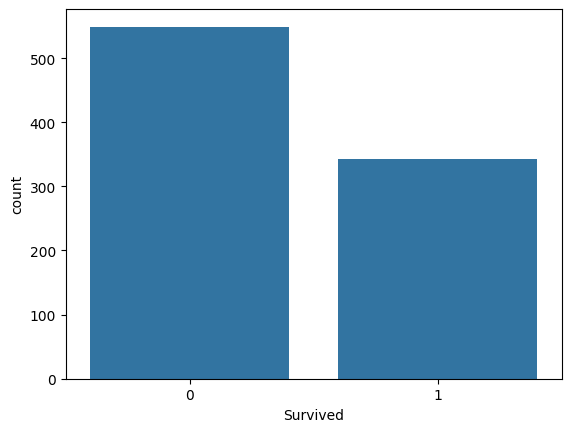

In [8]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

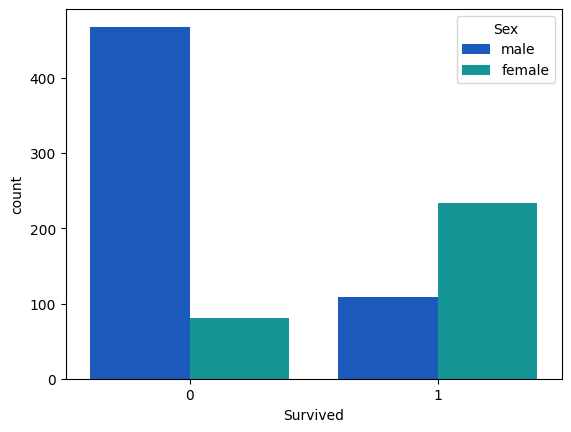

In [9]:
sns.countplot(x='Survived',hue='Sex', data=titanic, palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

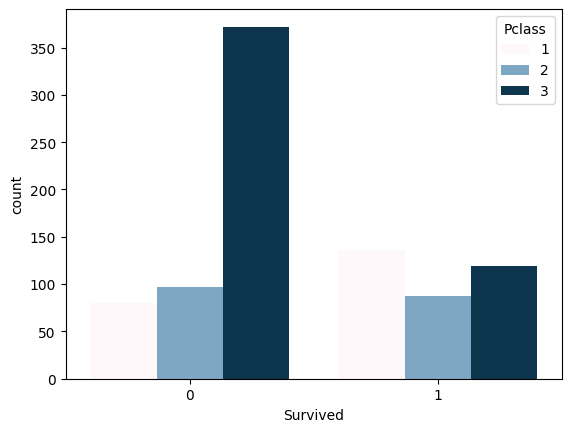

In [10]:
sns.countplot(x='Survived',hue='Pclass', data=titanic, palette='PuBu')

<Axes: ylabel='Frequency'>

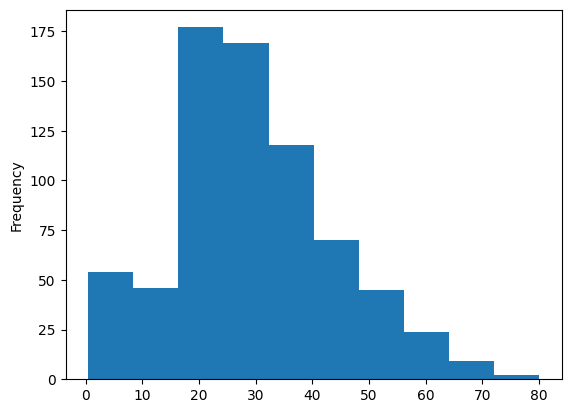

In [11]:
titanic['Age'].plot.hist()

<ipython-input-12-684b13d29397>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=titanic, palette='rocket')


<Axes: xlabel='SibSp', ylabel='count'>

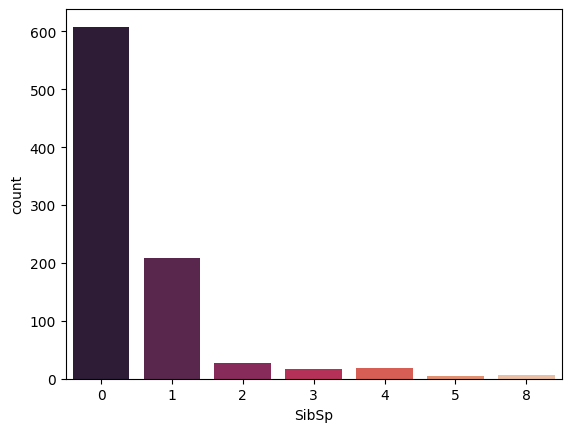

In [12]:
sns.countplot(x='SibSp', data=titanic, palette='rocket')

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

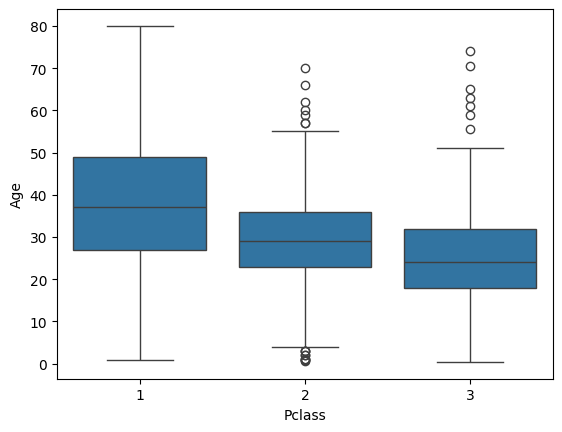

In [14]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [64]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [65]:
titanic.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


# Logistic Regression

In [68]:
data_csv = '/content/drive/My Drive/CODE_ALPHA/TASK1/train.csv'
titanic=pd.read_csv(data_csv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7762237762237763


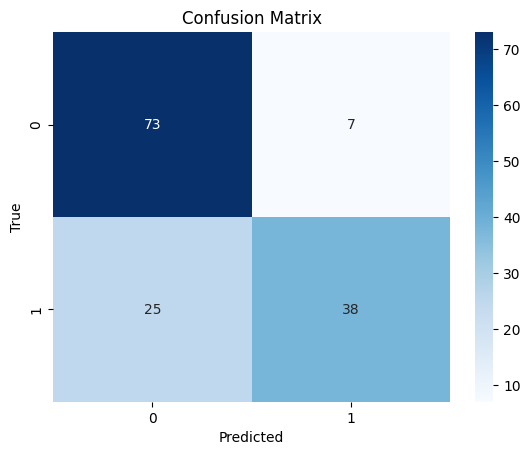

In [69]:
# Data preprocessing
# Dropping irrelevant columns and missing values
titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic.dropna(inplace=True)

# Convert categorical variables to numerical
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


we have the accuracy of 79% which is quite good and the model can predict the data accurately